# Problem Statement
In a competitve market like restaurant industry, understanding the factors that influences business success is crucial for stakeholders. Utilizing yelp dataset, this project aims relationship between user engagement (reviews, tips, check-ins) and business success metrics (review count, ratings) for restaurants.

### Research Objectives
1. **Quantify the correlation between user engagement (reviews, tips, check-ins) and review count/average star rating**: This will help us determine that with higher user engagement experience a corresponding increase in reviews and ratings.

2. **Analyze the impact of sentiment on review count and average star rating**: We will investigate if positive sentiment in reviews result into higher star ratings and potentially influences total number of reviews left.

3. **Time Trends in User Engagement**: We will explore if consistent user engagement over time is a stonger indicator of lont-term success compared to sporadic bursts of activity.

### Hypothesis Testing
- Higher levels of user engagement (more reviews, tips and check-ins) correlate with higher review count and ratings for restaurant
- Positive sentiment expressed in review and tips contributes to higher overall ratings and review count for restaurant
- Consistent engagement over time is positively associated with sustained business success for restaurants. 

## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [4]:
import json
from sqlalchemy import create_engine

In [3]:
# Function to read large JSON files efficiently
def read_large_json(file_path, chunk_size=100000):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            data.append(json.loads(line))
            if (i + 1) % chunk_size == 0:
                print(f"Processed {i+1} lines from {file_path}...")

    return pd.DataFrame(data)

# Base directory for all datasets
base_path = r'C:\Users\Admin\.cache\kagglehub\datasets\yelp-dataset\yelp-dataset\versions\4\\'

# Load each dataset efficiently
print("Loading Business Data...")
business_df = read_large_json(base_path + 'yelp_academic_dataset_business.json')

print("Loading Check-in Data...")
checkin_df = read_large_json(base_path + 'yelp_academic_dataset_checkin.json')

print("Loading Review Data...")
review_df = read_large_json(base_path + 'yelp_academic_dataset_review.json')

print("Loading Tip Data...")
tip_df = read_large_json(base_path + 'yelp_academic_dataset_tip.json')

print("Loading User Data...")
user_df = read_large_json(base_path + 'yelp_academic_dataset_user.json')

print("✅ All datasets loaded successfully!")


Loading Business Data...
Processed 100000 lines from C:\Users\Admin\.cache\kagglehub\datasets\yelp-dataset\yelp-dataset\versions\4\\yelp_academic_dataset_business.json...
Loading Check-in Data...
Processed 100000 lines from C:\Users\Admin\.cache\kagglehub\datasets\yelp-dataset\yelp-dataset\versions\4\\yelp_academic_dataset_checkin.json...
Loading Review Data...
Processed 100000 lines from C:\Users\Admin\.cache\kagglehub\datasets\yelp-dataset\yelp-dataset\versions\4\\yelp_academic_dataset_review.json...
Processed 200000 lines from C:\Users\Admin\.cache\kagglehub\datasets\yelp-dataset\yelp-dataset\versions\4\\yelp_academic_dataset_review.json...
Processed 300000 lines from C:\Users\Admin\.cache\kagglehub\datasets\yelp-dataset\yelp-dataset\versions\4\\yelp_academic_dataset_review.json...
Processed 400000 lines from C:\Users\Admin\.cache\kagglehub\datasets\yelp-dataset\yelp-dataset\versions\4\\yelp_academic_dataset_review.json...
Processed 500000 lines from C:\Users\Admin\.cache\kagglehub\

In [4]:
print(business_df.shape)
print(checkin_df.shape)
print(review_df.shape)
print(tip_df.shape)
print(user_df.shape)

(150346, 14)
(131930, 2)
(6990280, 9)
(908915, 5)
(1987897, 22)


In [5]:
business_df.drop(['attributes','hours'], axis=1, inplace=True)

In [6]:
# Creating database connection
engine = create_engine('sqlite:///yelp.db')

def load_dataframe(df, table_name, engine):
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)

# Load each DataFrame into separate table
load_dataframe(business_df, 'business', engine)
load_dataframe(review_df, 'review', engine)
load_dataframe(user_df, 'user', engine)
load_dataframe(tip_df, 'tip', engine)
load_dataframe(checkin_df, 'checkin', engine)

In [5]:
# Creating database connection
conn = sqlite3.connect('yelp.db')

In [6]:
tables = pd.read_sql_query("SELECT name from sqlite_master where type = 'table'",conn)

In [7]:
tables

,name
0,business
1,review
2,user
3,tip
4,checkin


In [106]:
for table in tables['name']:
    print(table)
    display(pd.read_sql_query(f"SELECT * from {table} limit 2", conn))

business


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."


review


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


user


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946


tip


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0


checkin


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."


# Data Analysis

In [9]:
pd.read_sql_query("select count(*) from business",conn)

,count(*)
0,150346


In [10]:
display(pd.read_sql_query("""
                  select count(*) from business where is_open=1 and lower(categories) like '%restaurant%'
                  """, conn))
business_id = pd.read_sql_query("""
                  select business_id from business where is_open=1 and lower(categories) like '%restaurant%'
                  """, conn)

,count(*)
0,35004


In [12]:
# What is the descriptive stats for review count and star rating for business ?

pd.read_sql_query(f"""
                  select 
                  avg(review_count) as avg_review_count, 
                  min(review_count) as min_review_count, 
                  max(review_count) as max_review_count,
                  (select review_count from business order by review_count limit 1 offset 
                    (select count(*) from business)/2) as median_review_count,
                  
                  avg(stars) as avg_stars_count, 
                  min(stars) as min_stars_count, 
                  max(stars) as max_stars_count,
                  (select stars from business order by stars limit 1 offset 
                    (select count(*) from business)/2) as median_stars_count
                  
                  from business 
                  where business_id IN {tuple(business_id['business_id'])}
                  """, conn).transpose()

,0
avg_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
avg_stars_count,3.523969
min_stars_count,1.000000
max_stars_count,5.000000
median_stars_count,3.500000


Since median review count and max are very different, there are outliers, but outlier can have meaning when we are trying to find out highest rated restaurants. So we will create a function that removes outliers when we need to.

***We will use IQR fro outliers remove***

In [103]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [18]:
business_id = pd.read_sql_query("""
                  select business_id, review_count from business where is_open=1 and lower(categories) like '%restaurant%'
                  """, conn)

In [22]:
business_id = remove_outlier(business_id, 'review_count')

In [23]:
business_id.shape

(31537, 2)

In [24]:
pd.read_sql_query(f"""
                  select 
                  avg(review_count) as avg_review_count, 
                  min(review_count) as min_review_count, 
                  max(review_count) as max_review_count,
                  (select review_count from business order by review_count limit 1 offset 
                    (select count(*) from business)/2) as median_review_count,
                  
                  avg(stars) as avg_stars_count, 
                  min(stars) as min_stars_count, 
                  max(stars) as max_stars_count,
                  (select stars from business order by stars limit 1 offset 
                    (select count(*) from business)/2) as median_stars_count
                  
                  from business 
                  where business_id IN {tuple(business_id['business_id'])}
                  """, conn).transpose()

,0
avg_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
avg_stars_count,3.477281
min_stars_count,1.000000
max_stars_count,5.000000
median_stars_count,3.500000


### Which restaurants has the highest number of reviews ?

In [ ]:
pd.read_sql_query(f"""
                  select name, review_count from business
                  where business_id in {tuple(business_id['business_id'])}
                  order by review_count desc limit 3;
                  """, conn)

## will need to do sum, since restaurant same restaurants have multiple entries in raw data. 

,name,review_count
0,Cucina Zapata,248
1,The Cheesecake Factory - Cool Springs,248
2,IHOP,248


In [33]:
pd.read_sql_query(f"""
                  select 
                  name, 
                  sum(review_count) as review_count,
                  avg(stars) as avg_rating
                  from business
                  where business_id in {tuple(business_id['business_id'])} 
                  group by name 
                  order by review_count desc 
                  limit 10;
                  """, conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


### Which restaurants has highest ratings ?

In [36]:
pd.read_sql_query(f"""
                  select 
                  name, 
                  sum(review_count) as review_count,
                  avg(stars) as avg_rating
                  from business
                  where business_id in {tuple(business_id['business_id'])} 
                  group by name 
                  order by avg(stars) desc 
                  limit 10;
                  """, conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


### Since review count and average rating both effects ordering, so we will make a sccess score out of both of them. 

## Do restaurants with higher engagement tend to have higher ratings ?

In [ ]:
pd.read_sql_query("""
                  select business_id,
                  sum(length(date) - length(replace(date,',',''))+1) as checkin_count
                  from checkin
                  group by business_id
                  """, conn)

# We count number of commas, and add + 1 since last date will not have comma. Checking dates is a string separated by
# commas. 

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [38]:
pd.read_sql_query("""
                  select business_id,
                  count(*) as tip_count
                  from tip
                  group by business_id
                  """, conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [43]:
review_count_df = pd.read_sql_query(f"""
    SELECT total.avg_rating as rating,
           AVG(total.review_count) as avg_review_count,
           AVG(total.checkin_count) as avg_checkin_count,
           AVG(total.tip_count) as avg_tip_count
    FROM
    (SELECT
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
        SUM(tip.tip_count) AS tip_count
     FROM
        business b
     LEFT JOIN
        checkin cc ON b.business_id = cc.business_id
     LEFT JOIN
        (SELECT business_id, count(business_id) as tip_count
         FROM tip
         GROUP BY business_id
         ORDER BY tip_count) as tip
     ON b.business_id = tip.business_id
     WHERE b.business_id IN {tuple(business_id['business_id'])}
     GROUP BY b.business_id) as total
    GROUP BY total.avg_rating
""", conn)


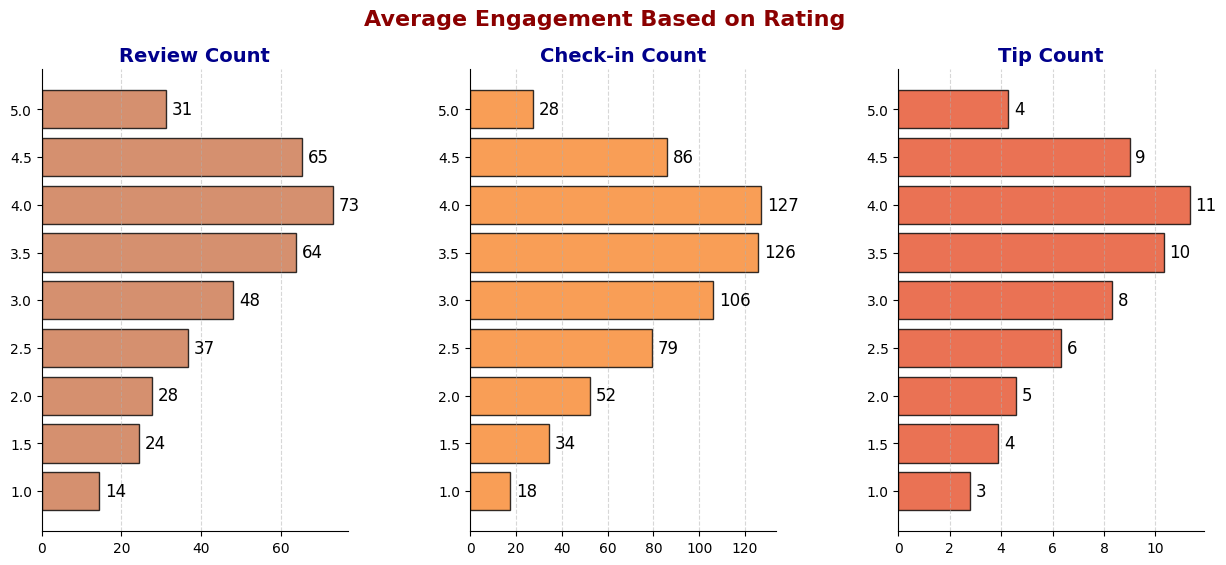

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'wspace': 0.4})

colors = ['#CB754B', '#F8862C', '#E54F29']
titles = ['Review Count', 'Check-in Count', 'Tip Count']
columns = ['avg_review_count', 'avg_checkin_count', 'avg_tip_count']

for i, ax in enumerate(axes):
    ax.set_title(titles[i], fontsize=14, fontweight='bold', color='darkblue')
    
    bars = ax.barh(review_count_df['rating'].astype(str), review_count_df[columns[i]], 
                   edgecolor='black', color=colors[i], alpha=0.8)
    
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for bar, value in zip(bars, review_count_df[columns[i]]):
        ax.text(value + max(review_count_df[columns[i]]) * 0.02, bar.get_y() + bar.get_height()/2, 
                f'{round(value)}', va='center', ha='left', fontsize=12, color='black')

fig.suptitle("Average Engagement Based on Rating", fontsize=16, fontweight='bold', color='darkred')

plt.show()


## Is there relationship between review count, tip count, and check in count?

### First let's check if there is a correlation between number of reviews, tips, and check-ins for a business?

In [62]:
engagement_df = pd.read_sql_query(f"""
    SELECT
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
        SUM(tip.tip_count) AS tip_count,
        CASE WHEN b.stars >= 3.5 THEN 'High-Rated' ELSE 'Low-Rated' END AS category
     FROM
        business b
     LEFT JOIN
        checkin cc ON b.business_id = cc.business_id
     LEFT JOIN
        (SELECT business_id, count(business_id) as tip_count
         FROM tip
         GROUP BY business_id
         ORDER BY tip_count) as tip
     ON b.business_id = tip.business_id
     WHERE b.business_id IN {tuple(business_id['business_id'])}
     GROUP BY b.business_id
""", conn).dropna()


In [51]:
engagement_df[['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


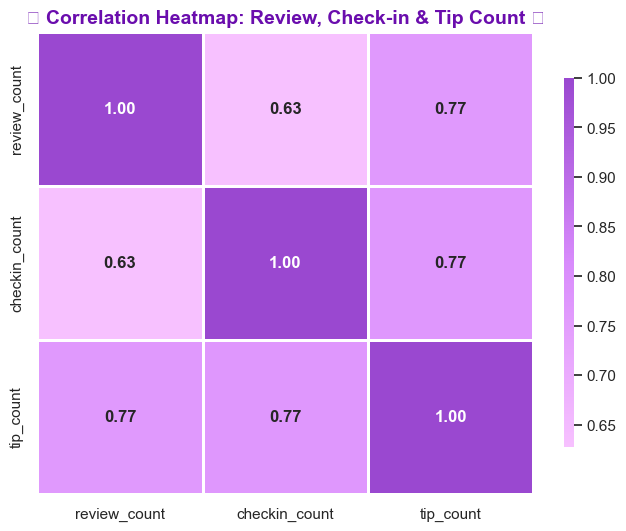

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

colors = ['#F7C1FF', '#D88BFC', '#9A48D0']  # L
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)

plt.figure(figsize=(8, 6))

sns.heatmap(
    engagement_df[['review_count', 'checkin_count', 'tip_count']].corr(), 
    cmap=custom_cmap, 
    annot=True, 
    fmt=".2f",  # Format decimals for readability
    annot_kws={"size": 12, "weight": "bold"},  # Bold numbers
    linewidths=1, 
    linecolor='white',  # White grid lines for a clean separation
    cbar_kws={'shrink': 0.8, 'aspect': 40}  # Adjust color bar proportions
)

plt.title("✨ Correlation Heatmap: Review, Check-in & Tip Count ✨", 
          fontsize=14, fontweight="bold", color='#6A0DAD')  # Stylish title

plt.show()


## Is there a difference in the user engagement (reviews, tips, and check-ins) between high-rated and low-rated businesses?


In [64]:
engagement_df.groupby("category")[['review_count','tip_count','checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
High-Rated,72.291062,10.162766,122.066641
Low-Rated,42.123420,6.541689,88.880828


In [73]:
import numpy as np

def calculate_success_metric(df):
    return df['avg_rating'] * np.log(df['review_count'] + 1)


### success_score=avg_rating×log(review_count+1)

In [74]:
city_df = pd.read_sql_query(f"""SELECT 
    city, 
    state, 
    latitude, 
    longitude, 
    AVG(stars) AS avg_rating, 
    SUM(review_count) AS review_count, 
    COUNT(*) AS restaurant_count
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY city, state
ORDER BY review_count DESC
LIMIT 10""", conn)

city_df['success_score'] = calculate_success_metric(city_df)

In [75]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [76]:
import folium
from folium.plugins import HeatMap
import branca

# Create a base map centered around the average latitude and longitude
m = folium.Map(
    location=[city_df['latitude'].mean(), city_df['longitude'].mean()],
    zoom_start=5,  # Slightly zoomed-in for better visibility
    tiles="cartodbpositron"  # A clean, modern tile style
)

# Define a color scale for the success score
color_scale = branca.colormap.LinearColormap(
    colors=['green', 'yellow', '#E54F29'],
    vmin=city_df['success_score'].min(),
    vmax=city_df['success_score'].max(),
    caption="Success Score"
)

# Add circle markers with improved styling
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=7,  # Increased size for better visibility
        color=color_scale(row['success_score']),  # Dynamic color based on score
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.8,  # Slightly more visible fill
        popup=folium.Popup(f"<b>Success Score:</b> {row['success_score']:.2f}", max_width=200),
        weight=1  # Adds a thin border around the circle
    ).add_to(m)

# Add the color scale to the map
m.add_child(color_scale)

# Optional: Add a heatmap layer for an alternative visualization
heat_data = city_df[['latitude', 'longitude', 'success_score']].values.tolist()
HeatMap(heat_data, radius=15, blur=10).add_to(m)

# Display the map
m


In [77]:
# Are there any patterns in user engagement over time for successful businesses compared to less successful ones?
# Are there any seasonal trends in the user engagement for restaurants?

high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as tip
on review.month_year = tip.month_year
;""",conn)

low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars < 3.5
GROUP BY month_year
ORDER BY month_year) as tip
on review.month_year = tip.month_year
;""",conn)


In [79]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [80]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [81]:
time_rating = pd.read_sql_query(f"""
SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) as avg_rating
FROM review
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year
;""",conn)

time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [82]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace = True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace = True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']


In [ ]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

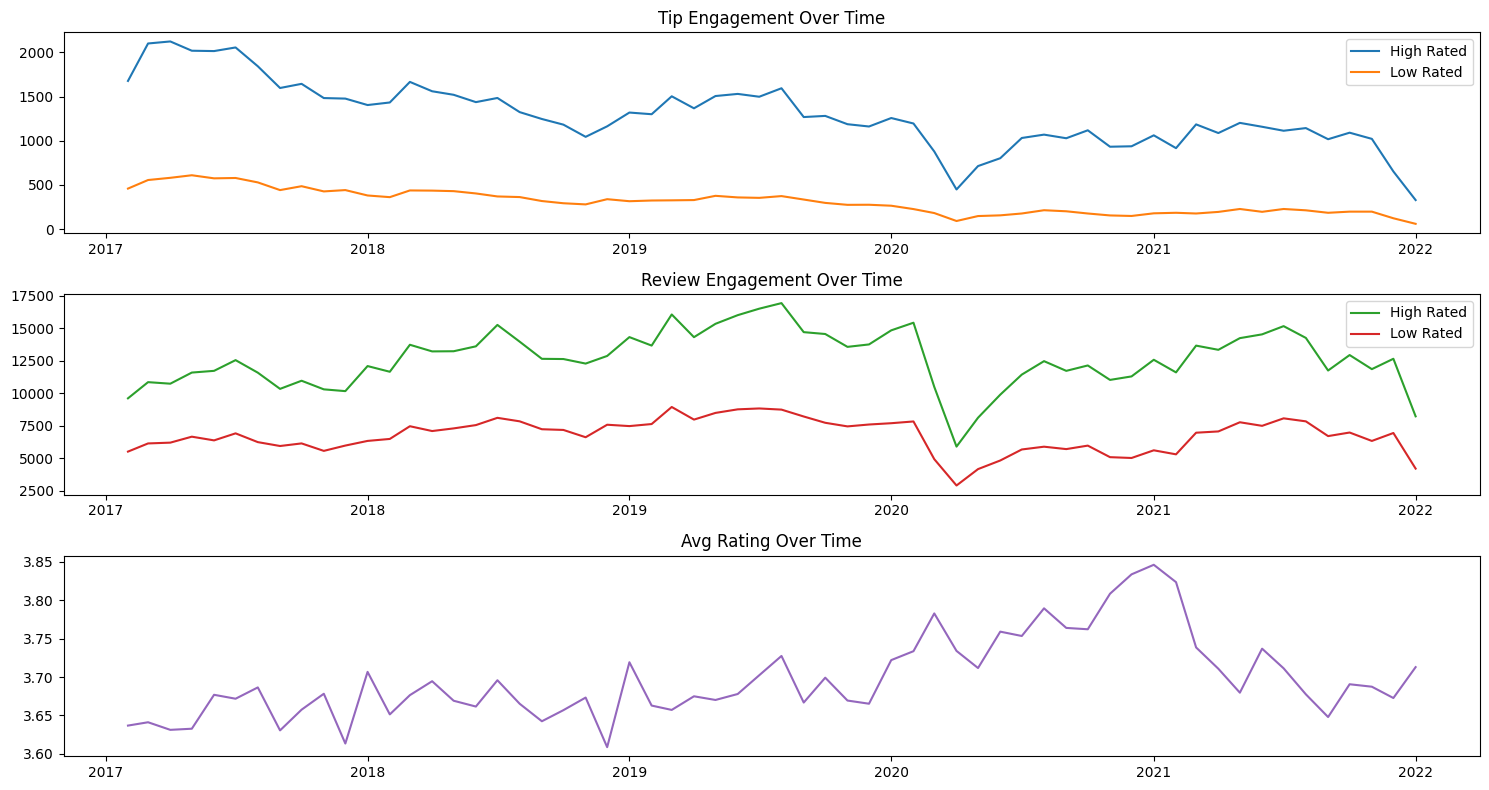

In [83]:
plt.figure(figsize = (15,8))

plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label='High Rated', color='#1f77b4')  # Blue
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label='Low Rated', color='#ff7f0e')  # Orange
plt.legend()

plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label='High Rated', color='#2ca02c')  # Green
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label='Low Rated', color='#d62728')  # Red
plt.legend()

plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color='#9467bd')  # Purple

plt.tight_layout()
plt.show()


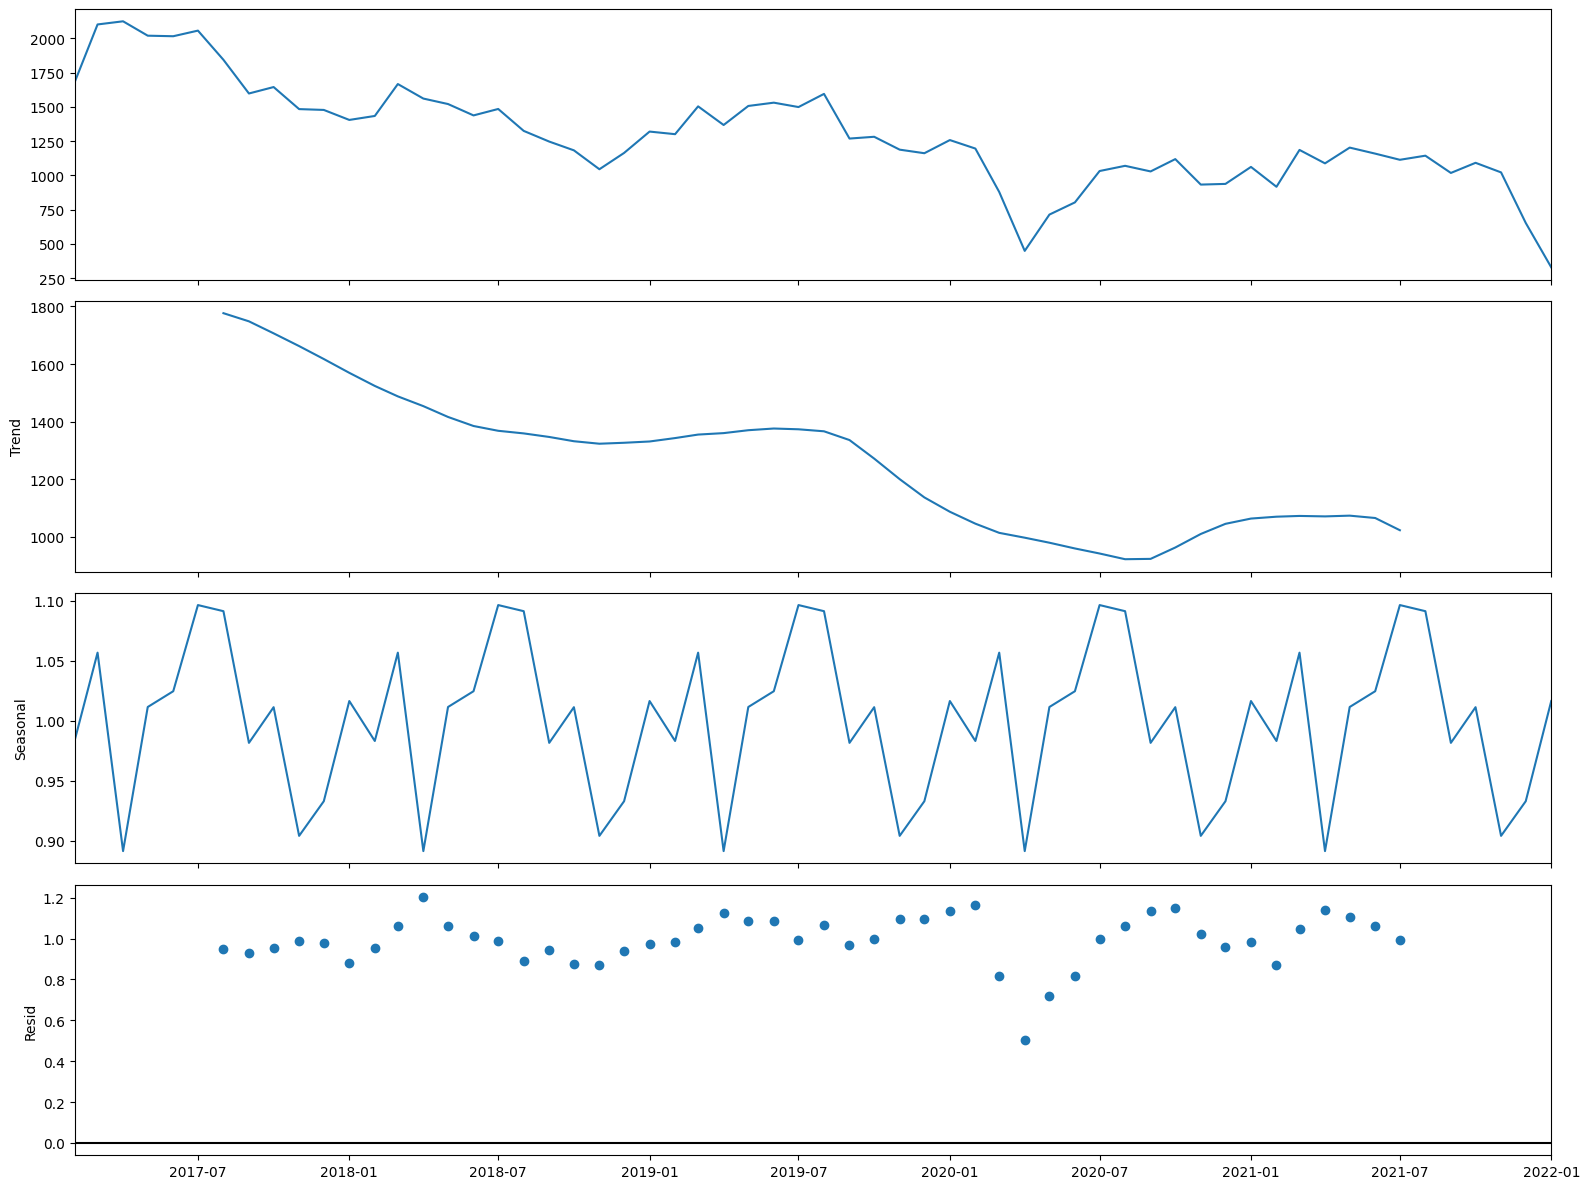

In [84]:
tip_high_rated = high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')

from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated,
                                                  model='multiplicative', period=12)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()


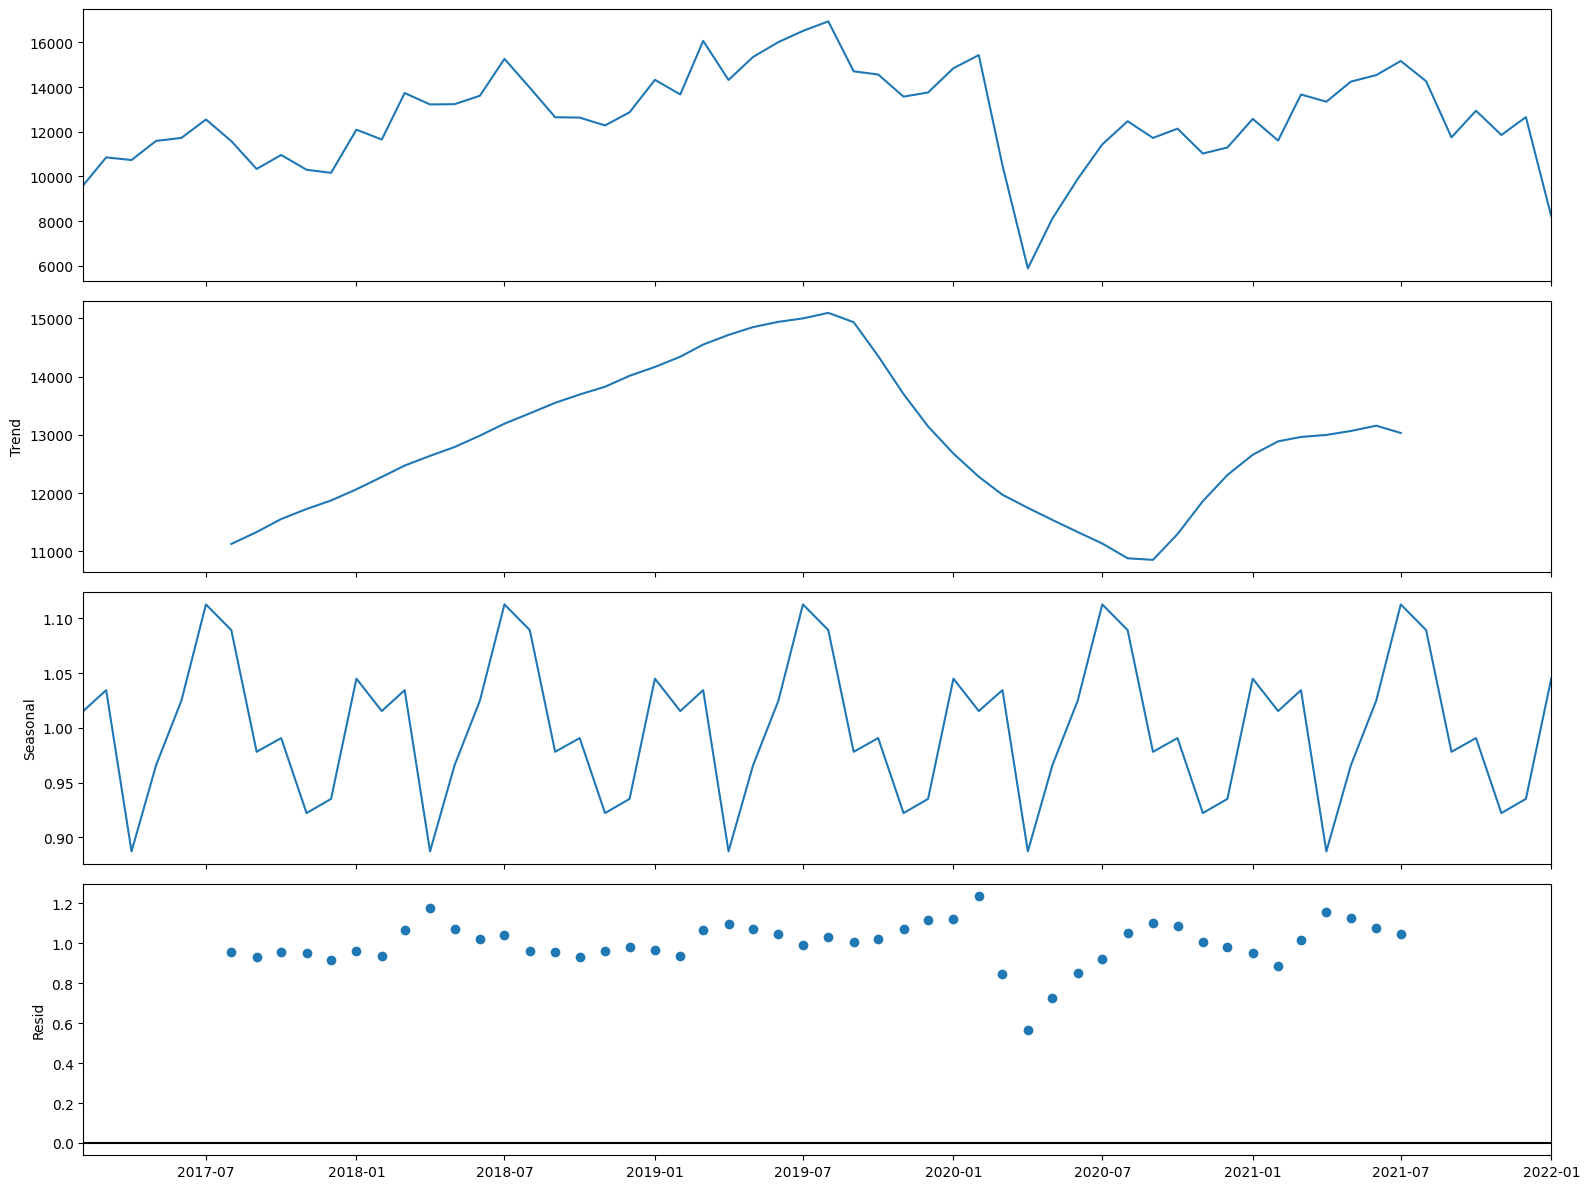

In [85]:
multiplicative_decomposition = seasonal_decompose(review_high_rated,
                                                  model='multiplicative', period=12)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()


In [ ]:
sentiment_df = pd.read_sql_query(f"""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
(SELECT business_id,
SUM(useful) as useful_count,
SUM(funny) as funny_count,
SUM(cool) as cool_count
FROM
review
GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY review_count""",conn)

sentiment_df = remove_outlier(sentiment_df,'review_count')
sentiment_df = remove_outlier(sentiment_df,'useful_count')
sentiment_df = remove_outlier(sentiment_df,'funny_count')
sentiment_df = remove_outlier(sentiment_df,'cool_count')


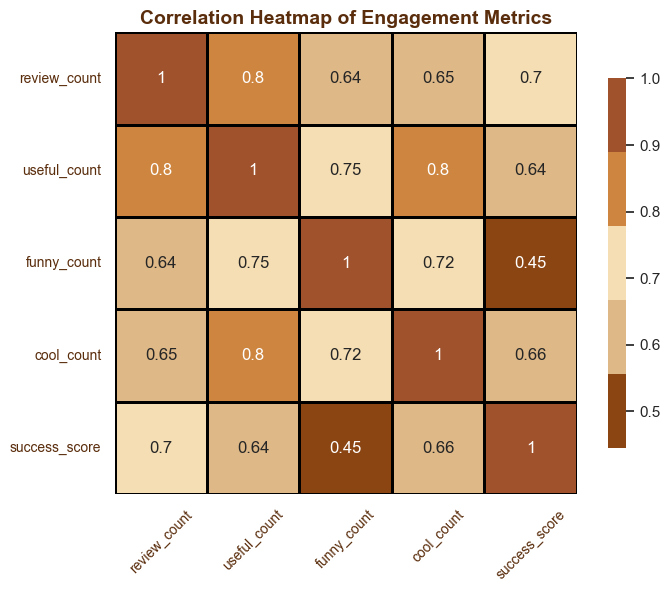

In [ ]:
custom_cmap = sns.color_palette(["#8B4513", "#DEB887", "#F5DEB3", "#CD853F", "#A0522D"], as_cmap=True)

sns.set_theme(style="white")

plt.figure(figsize=(8, 6))
sns.heatmap(
    sentiment_df.iloc[:, 2:].corr(), 
    cmap=custom_cmap,  
    annot=True, 
    linewidths=1, 
    linecolor="black",
    cbar_kws={"shrink": 0.8},  
    square=True
)

plt.title("Correlation Heatmap of Engagement Metrics", fontsize=14, fontweight='bold', color="#5A2D0C")  # Dark brown text
plt.xticks(fontsize=10, rotation=45, color="#5A2D0C")  
plt.yticks(fontsize=10, rotation=0, color="#5A2D0C")  

plt.show()


In [95]:
# Is there any difference in engagement of elite users and non-elite users?

elite_df = pd.read_sql_query("""SELECT
    elite,
    COUNT(*) AS num_users,
    SUM(review_count) AS total_review_count
FROM
    (SELECT
        CASE
            WHEN elite = '' THEN 'Not Elite'
            ELSE 'Elite'
        END AS elite,
        u.review_count
    FROM
        user u) AS user_elite
GROUP BY
    elite;
""", conn)
elite_df

,elite,num_users,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


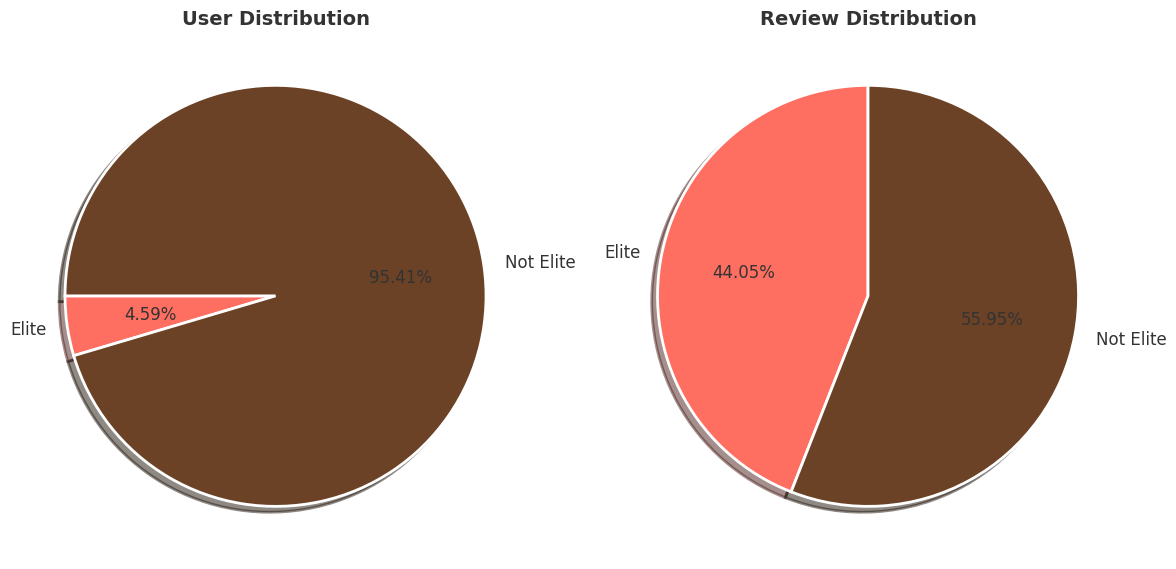

In [ ]:
colors = ['#FF6F61', '#6B4226']

plt.figure(figsize=(12, 6), facecolor='white')

plt.subplot(1, 2, 1)
plt.title('User Distribution', fontsize=14, fontweight='bold', color='#333')
plt.pie(elite_df['num_users'], labels=elite_df['elite'], autopct='%.2f%%',
        startangle=180, colors=colors, shadow=True, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}, 
        textprops={'fontsize': 12, 'color': '#333'})

plt.subplot(1, 2, 2)
plt.title('Review Distribution', fontsize=14, fontweight='bold', color='#333')
plt.pie(elite_df['total_review_count'], labels=elite_df['elite'], autopct='%.2f%%',
        startangle=90, colors=colors, shadow=True, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}, 
        textprops={'fontsize': 12, 'color': '#333'})

plt.tight_layout()
plt.show()


In [99]:
# What are the busiest hours for restaurants?

review_engagement = pd.read_sql_query("""SELECT
    cast (strftime('%H', date) as integer) as hour,
    COUNT(*) AS review_count
FROM
    review
GROUP BY
    hour;
""",conn)

tip_engagement = pd.read_sql_query("""SELECT
    cast (strftime('%H', date) as integer) as hour,
    COUNT(*) AS tip_count
FROM
    tip
GROUP BY
    hour;
""",conn)

checkin = pd.read_sql_query("""SELECT date FROM checkin""",conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[0].count()


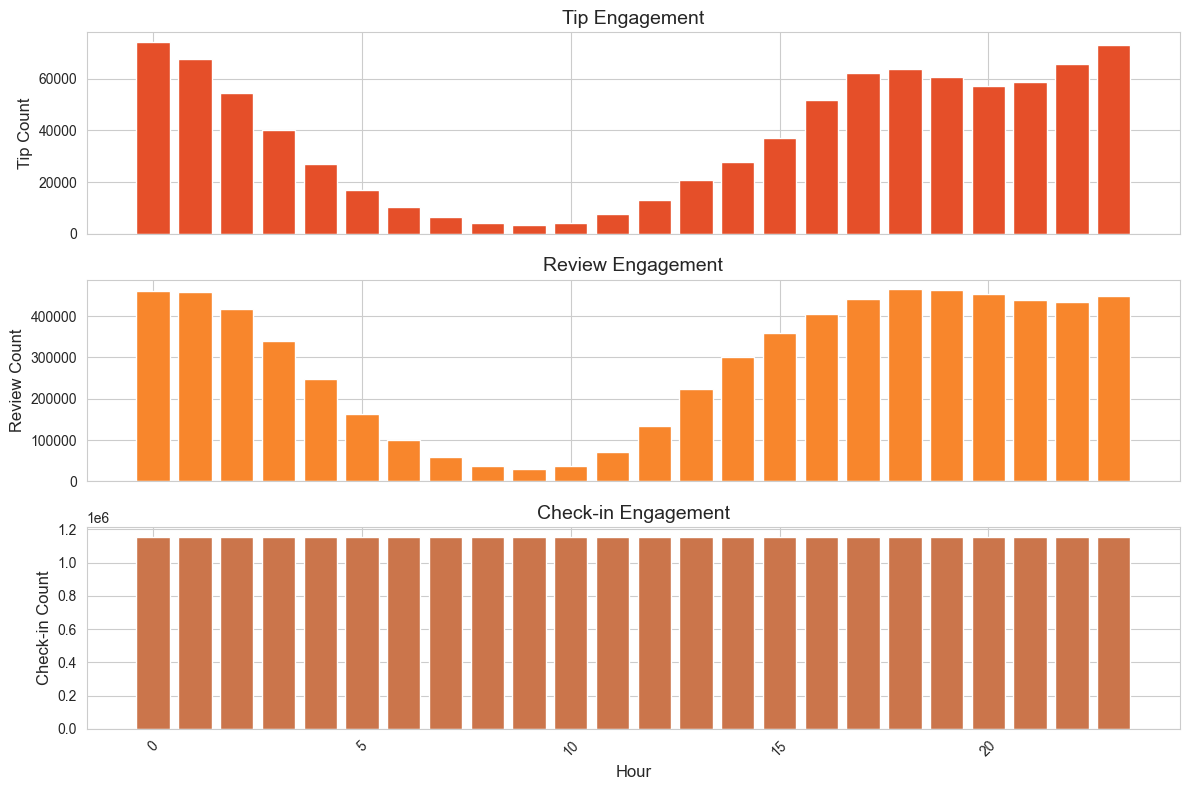

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].bar(tip_engagement['hour'], tip_engagement['tip_count'], color='#E54F29')
axes[0].set_title('Tip Engagement', fontsize=14)
axes[0].set_ylabel('Tip Count', fontsize=12)

axes[1].bar(review_engagement['hour'], review_engagement['review_count'], color='#F8862C')
axes[1].set_title('Review Engagement', fontsize=14)
axes[1].set_ylabel('Review Count', fontsize=12)

axes[2].bar(checkin_engagement.index, checkin_engagement[0], color='#CB754B')
axes[2].set_title('Check-in Engagement', fontsize=14)
axes[2].set_ylabel('Check-in Count', fontsize=12)
axes[2].set_xlabel('Hour', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
